## Dielectric Model Within a Capcitor
A Script to determine the charge polarization within a dielectric material due to the experienced field from the capacitor.

Coulomb constant k = 8.99e+09 N·m²/C²
External electric field (E_ext): 1.00e+05 N/C, direction: [0, -1]
Polarization (P): 2.66e-07 C/m², direction: [0, -1]
Induced electric field (E_ind): 3.00e+04 N/C, direction: [0, 1]
Net electric field in dielectric (E_net): 7.00e+04 N/C, direction: [0, -1]
Theoretical ratio E_net/E_ext = 1/κ: 0.7000 = 0.7692
Surface charge density = 8.85e-07 C/m²


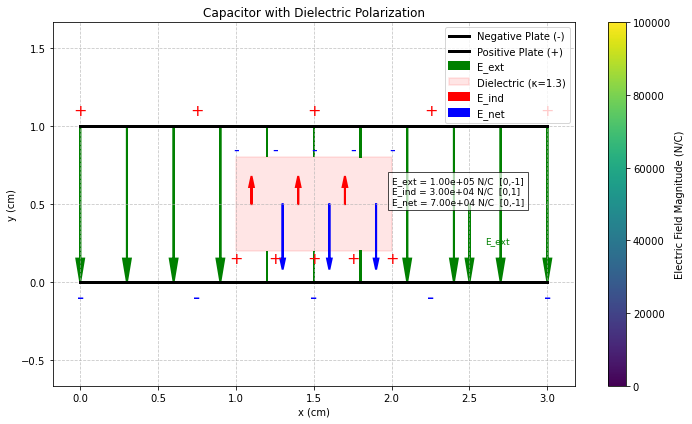

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Rectangle

# Define physical constants
e0 = const.epsilon_0  # Vacuum permittivity (F/m)
e = const.elementary_charge  # Elementary charge (C)
k = 1/(4*np.pi*e0)  # Coulomb constant (N·m²/C²)
print(f"Coulomb constant k = {k:.2e} N·m²/C²")

# Define utility functions for electric field calculations
def mag_hat(vector):
    """Calculate magnitude and unit vectors"""
    magnitude = np.linalg.norm(vector)
    hat = vector/magnitude if magnitude > 0 else vector
    return magnitude, hat

def e_calc(charge, rmag, rhat):
    """Calculate electric field using EQN: (kq/|r|^2)*rhat"""
    e_field = (k*charge/rmag**2)*rhat
    return e_field

# Define the dimensions of the capacitor (in meters)
plate_length = 0.03  # 3 cm converted to m 
plate_separation = 0.01  # 1 cm converted to m
margin = 0.01  # 1 cm converted to m

# Define the dielectric properties
dielectric_constant = 1.3  # Relative permittivity (κ)
susceptibility = dielectric_constant - 1  # Electric susceptibility χₑ

# Define the dimensions of the dielectric box (in meters)
dielectric_width = 0.01  # 1 cm wide
dielectric_height = 0.006  # 0.6 cm tall

# Center position for the dielectric
dielectric_x = (plate_length - dielectric_width) / 2  # Centered horizontally
dielectric_y = (plate_separation - dielectric_height) / 2  # Centered vertically

# Calculate electric fields
E_ext = 1.0e5  # External field magnitude (N/C) - typical value for capacitor
E_ext_vector = np.array([0, -E_ext])  # External field is downward

# Calculate polarization vector (P = ε₀χₑE_ext)
P_magnitude = e0 * susceptibility * E_ext
P_vector = np.array([0, -P_magnitude])  # Polarization points in same direction as E_ext

# Calculate the induced field inside dielectric (E_ind = -P/ε₀)
E_ind_magnitude = P_magnitude / e0
E_ind_vector = np.array([0, E_ind_magnitude])  # Induced field points opposite to E_ext

# Calculate the net field inside the dielectric (E_net = E_ext + E_ind = E_ext - P/ε₀)
E_net_magnitude = E_ext - E_ind_magnitude
E_net_vector = np.array([0, -E_net_magnitude])  # Net field is downward but reduced

# Print the field calculations
print(f"External electric field (E_ext): {E_ext:.2e} N/C, direction: [0, -1]")
print(f"Polarization (P): {P_magnitude:.2e} C/m², direction: [0, -1]")
print(f"Induced electric field (E_ind): {E_ind_magnitude:.2e} N/C, direction: [0, 1]")
print(f"Net electric field in dielectric (E_net): {E_net_magnitude:.2e} N/C, direction: [0, -1]")
print(f"Theoretical ratio E_net/E_ext = 1/κ: {E_net_magnitude/E_ext:.4f} = {1/dielectric_constant:.4f}")

# Create a set of points for the arrows that span the capacitor
num_arrows = 11  # Number of arrows across the capacitor
arrow_x = np.linspace(0, plate_length, num_arrows)  # Evenly spaced x positions
arrow_starts_x = arrow_x  # X-coordinates for arrow starts
arrow_starts_y = np.full_like(arrow_x, plate_separation)  # Start from positive plate
arrow_ends_x = arrow_x  # X-coordinates for arrow ends
arrow_ends_y = np.zeros_like(arrow_x)  # End at negative plate

# Create a uniform electric field magnitude
E_magnitude = np.ones_like(arrow_x) * E_ext  # Uniform field of 1.0e5 N/C

# Surface charge density (C/m²) for a uniform field
# For a uniform field, sigma = epsilon_0 * E
sigma = e0 * E_ext  # C/m²
print(f"Surface charge density = {sigma:.2e} C/m²")

# Create a figure with a specific aspect ratio
plt.figure(figsize=(10, 6))

# Set up the plotting area (convert to cm for visualization)
plt.xlim(-margin*100, (plate_length+margin)*100)
plt.ylim(-margin*100, (plate_separation+margin)*100)

# Draw the plates (convert to cm for visualization)
plt.plot([0, plate_length*100], [0, 0], 'k-', linewidth=3, label='Negative Plate (-)')
plt.plot([0, plate_length*100], [plate_separation*100, plate_separation*100], 'k-', linewidth=3, label='Positive Plate (+)')

# Create vectors to determine which points are inside the dielectric
is_in_dielectric = []
for x in arrow_x:
    is_in_dielectric.append(
        dielectric_x <= x <= dielectric_x + dielectric_width
    )

# Plot arrows for the external electric field (E_ext) outside the dielectric
for i, x in enumerate(arrow_x):
    if not is_in_dielectric[i]:
        # Draw the external field arrow (E_ext)
        plt.arrow(arrow_starts_x[i]*100, arrow_starts_y[i]*100, 
                  0, -plate_separation*100,
                  head_width=0.05, head_length=0.15, 
                  fc='green', ec='green', 
                  length_includes_head=True,
                  linewidth=2,
                  label='E_ext' if i == 0 else "")

# Add the dielectric rectangle
rect = Rectangle((dielectric_x*100, dielectric_y*100), 
                dielectric_width*100, dielectric_height*100,
                linewidth=1.5, edgecolor='red', facecolor='red', alpha=0.1,
                label=f'Dielectric (κ={dielectric_constant})')
plt.gca().add_patch(rect)

# Add arrows inside dielectric region
for i, x in enumerate(arrow_x):
    if is_in_dielectric[i]:
        # Add external field arrow (above dielectric)
        plt.arrow(arrow_starts_x[i]*100, arrow_starts_y[i]*100, 
                  0, -(plate_separation - (dielectric_y + dielectric_height))*100,
                  head_width=0, head_length=0, 
                  fc='green', ec='green', 
                  linewidth=2)
        
        # Add induced field arrow (E_ind) inside dielectric - pointing upward
        # Using actual magnitude of induced field for length
        arrow_length_ind = E_ind_magnitude / E_ext * dielectric_height  # Scale to match external field
        plt.arrow((arrow_starts_x[i]-0.001)*100, (dielectric_y + dielectric_height/2)*100, 
                  0, arrow_length_ind*100,
                  head_width=0.03, head_length=0.07, 
                  fc='red', ec='red', 
                  length_includes_head=True,
                  linewidth=2,
                  label='E_ind' if i == 5 else "")  # First arrow in dielectric
        
        # Add net field arrow (E_net) inside dielectric - pointing downward
        # Using actual magnitude of net field for length
        arrow_length_net = E_net_magnitude / E_ext * dielectric_height  # Scale to match external field
        plt.arrow((arrow_starts_x[i]+0.001)*100, (dielectric_y + dielectric_height/2)*100, 
                  0, -arrow_length_net*100,
                  head_width=0.03, head_length=0.07, 
                  fc='blue', ec='blue', 
                  length_includes_head=True,
                  linewidth=2,
                  label='E_net' if i == 5 else "")
        
        # External field continues below dielectric
        plt.arrow(arrow_starts_x[i]*100, dielectric_y*100, 
                  0, -dielectric_y*100,
                  head_width=0, head_length=0, 
                  fc='green', ec='green', 
                  linewidth=2)

# Add bound charges on dielectric surfaces to show polarization effect
# Negative charges on top surface
for i in range(5):
    x_pos = dielectric_x*100 + i * dielectric_width*100/4
    plt.text(x_pos, (dielectric_y + dielectric_height)*100 + 0.05, '-', 
             fontsize=16, color='blue', ha='center', va='center')

# Positive charges on bottom surface
for i in range(5):
    x_pos = dielectric_x*100 + i * dielectric_width*100/4
    plt.text(x_pos, dielectric_y*100 - 0.05, '+', 
             fontsize=16, color='red', ha='center', va='center')

# Add "+" and "-" symbols to indicate plate charges
for i in range(5):
    x_pos = i * plate_length * 100 / 4
    plt.text(x_pos, plate_separation*100+0.1, '+', fontsize=16, color='red', 
             horizontalalignment='center', verticalalignment='center')
    plt.text(x_pos, -0.1, '-', fontsize=20, color='blue', 
             horizontalalignment='center', verticalalignment='center')

# Add field magnitude annotation
plt.text((plate_length - margin)*100, (plate_separation/2)*100,
         f"E_ext = {E_ext:.2e} N/C  [0,-1]\n" + 
         f"E_ind = {E_ind_magnitude:.2e} N/C  [0,1]\n" + 
         f"E_net = {E_net_magnitude:.2e} N/C  [0,-1]",
         fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

# Add a vector key for clarity
plt.arrow((plate_length - margin/2)*100, (plate_separation - margin/2)*100, 
          0, -0.005*100,
          head_width=0.05, head_length=0.15, 
          fc='green', ec='green', 
          length_includes_head=True,
          linewidth=2)
plt.text((plate_length - margin/2 + 0.001)*100, (plate_separation - margin/2 - 0.0025)*100,
         "E_ext",
         color='green', fontsize=9)

# Add a colorbar for the electric field magnitude
norm = Normalize(vmin=0.0, vmax=E_ext)
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array(E_magnitude)
cbar = plt.colorbar(sm)
cbar.set_label('Electric Field Magnitude (N/C)')

# Set labels and title
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Capacitor with Dielectric Polarization')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')

# Set equal scaling for x and y axes
plt.axis('equal')
plt.tight_layout()
# plt.savefig("Dielectric-model.png")
plt.show()


## Boundaries

Coulomb constant k = 8.99e+09 N·m²/C²
External electric field (E_ext): 1.00e+05 N/C, direction: [0, -1]
Polarization (P): 2.66e-07 C/m², direction: [0, -1]
Induced electric field (E_ind): 3.00e+04 N/C, direction: [0, 1]
Net electric field in dielectric (E_net): 7.00e+04 N/C, direction: [0, -1]
Theoretical ratio E_net/E_ext = 1/κ: 0.7000 = 0.7692


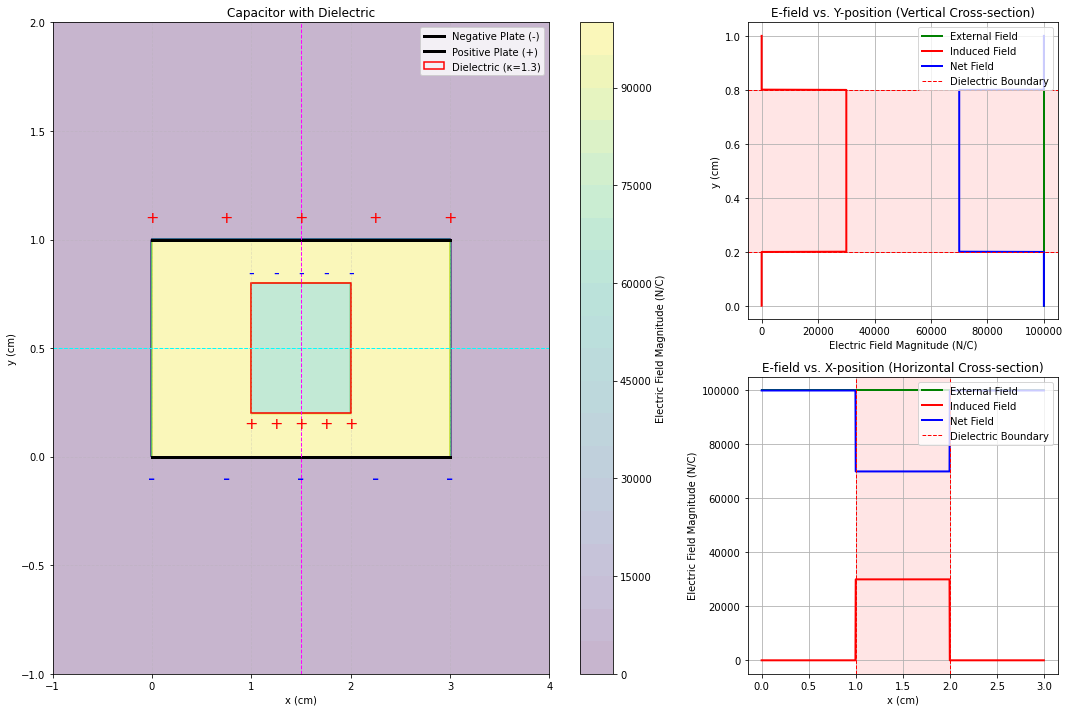

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec

# Define physical constants
e0 = const.epsilon_0  # Vacuum permittivity (F/m)
e = const.elementary_charge  # Elementary charge (C)
k = 1/(4*np.pi*e0)  # Coulomb constant (N·m²/C²)
print(f"Coulomb constant k = {k:.2e} N·m²/C²")

# Define the dimensions of the capacitor (in meters)
plate_length = 0.03  # 3 cm converted to m 
plate_separation = 0.01  # 1 cm converted to m
margin = 0.01  # 1 cm converted to m

# Define the dielectric properties
dielectric_constant = 1.3  # Relative permittivity (κ)
susceptibility = dielectric_constant - 1  # Electric susceptibility χₑ

# Define the dimensions of the dielectric box (in meters)
dielectric_width = 0.01  # 1 cm wide
dielectric_height = 0.006  # 0.6 cm tall

# Center position for the dielectric
dielectric_x = (plate_length - dielectric_width) / 2  # Centered horizontally
dielectric_y = (plate_separation - dielectric_height) / 2  # Centered vertically

# Calculate electric fields
E_ext = 1.0e5  # External field magnitude (N/C) - typical value for capacitor
E_ext_vector = np.array([0, -E_ext])  # External field is downward

# Calculate polarization vector (P = ε₀χₑE_ext)
P_magnitude = e0 * susceptibility * E_ext
P_vector = np.array([0, -P_magnitude])  # Polarization points in same direction as E_ext

# Calculate the induced field inside dielectric (E_ind = -P/ε₀)
E_ind_magnitude = P_magnitude / e0
E_ind_vector = np.array([0, E_ind_magnitude])  # Induced field points opposite to E_ext

# Calculate the net field inside the dielectric (E_net = E_ext + E_ind = E_ext - P/ε₀)
E_net_magnitude = E_ext - E_ind_magnitude
E_net_vector = np.array([0, -E_net_magnitude])  # Net field is downward but reduced

# Print the field calculations
print(f"External electric field (E_ext): {E_ext:.2e} N/C, direction: [0, -1]")
print(f"Polarization (P): {P_magnitude:.2e} C/m², direction: [0, -1]")
print(f"Induced electric field (E_ind): {E_ind_magnitude:.2e} N/C, direction: [0, 1]")
print(f"Net electric field in dielectric (E_net): {E_net_magnitude:.2e} N/C, direction: [0, -1]")
print(f"Theoretical ratio E_net/E_ext = 1/κ: {E_net_magnitude/E_ext:.4f} = {1/dielectric_constant:.4f}")

# Create a figure with multiple plots
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])

# ------ First plot: Capacitor visualization ------
ax1 = fig.add_subplot(gs[:, 0])

# Set up the plotting area (convert to cm for visualization)
ax1.set_xlim(-margin*100, (plate_length+margin)*100)
ax1.set_ylim(-margin*100, (plate_separation+margin)*100)

# Draw the plates (convert to cm for visualization)
ax1.plot([0, plate_length*100], [0, 0], 'k-', linewidth=3, label='Negative Plate (-)')
ax1.plot([0, plate_length*100], [plate_separation*100, plate_separation*100], 'k-', linewidth=3, label='Positive Plate (+)')

# Define functions to calculate electric fields at any point
def calculate_ext_field(x, y):
    """Calculate external electric field magnitude at point (x, y) in m"""
    # Inside capacitor
    if 0 <= x <= plate_length and 0 <= y <= plate_separation:
        return E_ext  # External field is constant inside capacitor
    # Outside capacitor
    return 0.0  # Zero field outside capacitor (simplified)

def calculate_ind_field(x, y):
    """Calculate induced electric field magnitude at point (x, y) in m"""
    # Check if the point is inside the dielectric
    in_dielectric = (dielectric_x <= x <= dielectric_x + dielectric_width and 
                    dielectric_y <= y <= dielectric_y + dielectric_height)
    
    # Inside dielectric, induced field is present
    if in_dielectric:
        return E_ind_magnitude  # Induced field in dielectric
    else:
        return 0.0  # No induced field outside dielectric

def calculate_net_field(x, y):
    """Calculate net electric field magnitude at point (x, y) in m"""
    # Check if the point is inside the dielectric
    in_dielectric = (dielectric_x <= x <= dielectric_x + dielectric_width and 
                    dielectric_y <= y <= dielectric_y + dielectric_height)
    
    # Inside capacitor
    if 0 <= x <= plate_length and 0 <= y <= plate_separation:
        if in_dielectric:
            return E_net_magnitude  # Reduced field in dielectric
        else:
            return E_ext  # Full field in vacuum/air
    
    # Outside capacitor
    return 0.0  # Zero field outside capacitor (simplified)

# Create a fine grid for electric field heatmap
x_fine = np.linspace(-margin, plate_length + margin, 300)
y_fine = np.linspace(-margin, plate_separation + margin, 300)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
Z_field = np.zeros_like(X_fine)

# Calculate field at each point
for i in range(X_fine.shape[0]):
    for j in range(X_fine.shape[1]):
        Z_field[i, j] = calculate_net_field(X_fine[i, j], Y_fine[i, j])

# Create a colormap for the electric field
contour = ax1.contourf(X_fine*100, Y_fine*100, Z_field, levels=20, 
                      cmap='viridis', alpha=0.3)
cbar = plt.colorbar(contour, ax=ax1)
cbar.set_label('Electric Field Magnitude (N/C)')

# Add the dielectric rectangle
rect = Rectangle((dielectric_x*100, dielectric_y*100), 
                dielectric_width*100, dielectric_height*100,
                linewidth=1.5, edgecolor='red', facecolor='none',
                label=f'Dielectric (κ={dielectric_constant})')
ax1.add_patch(rect)

# Add guide lines for the cross-sections we'll plot
# Vertical line (for x-axis cross-section)
center_x = (dielectric_x + dielectric_width/2) * 100
ax1.axvline(x=center_x, color='magenta', linestyle='--', linewidth=1)

# Horizontal line (for y-axis cross-section)
center_y = (dielectric_y + dielectric_height/2) * 100
ax1.axhline(y=center_y, color='cyan', linestyle='--', linewidth=1)

# Add bound charges on dielectric surfaces to show polarization effect
# Negative charges on top surface
for i in range(5):
    x_pos = dielectric_x*100 + i * dielectric_width*100/4
    ax1.text(x_pos, (dielectric_y + dielectric_height)*100 + 0.05, '-', 
             fontsize=16, color='blue', ha='center', va='center')

# Positive charges on bottom surface
for i in range(5):
    x_pos = dielectric_x*100 + i * dielectric_width*100/4
    ax1.text(x_pos, dielectric_y*100 - 0.05, '+', 
             fontsize=16, color='red', ha='center', va='center')

# Add "+" and "-" symbols to indicate plate charges
for i in range(5):
    x_pos = i * plate_length * 100 / 4
    ax1.text(x_pos, plate_separation*100+0.1, '+', fontsize=16, color='red', 
             horizontalalignment='center', verticalalignment='center')
    ax1.text(x_pos, -0.1, '-', fontsize=20, color='blue', 
             horizontalalignment='center', verticalalignment='center')

# Set labels and title for first plot
ax1.set_xlabel('x (cm)')
ax1.set_ylabel('y (cm)')
ax1.set_title('Capacitor with Dielectric')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.legend(loc='upper right')

# ------ Second plot: Y-axis cross-section ------
ax2 = fig.add_subplot(gs[0, 1])

# Create data for vertical cross-section (fixed x)
y_vals = np.linspace(0, plate_separation, 1000)
E_ext_vals_y = np.array([calculate_ext_field(dielectric_x + dielectric_width/2, y) for y in y_vals])
E_ind_vals_y = np.array([calculate_ind_field(dielectric_x + dielectric_width/2, y) for y in y_vals])
E_net_vals_y = np.array([calculate_net_field(dielectric_x + dielectric_width/2, y) for y in y_vals])

# Plot E-field magnitudes vs. y
ax2.plot(E_ext_vals_y, y_vals*100, 'g-', linewidth=2, label='External Field')
ax2.plot(E_ind_vals_y, y_vals*100, 'r-', linewidth=2, label='Induced Field')
ax2.plot(E_net_vals_y, y_vals*100, 'b-', linewidth=2, label='Net Field')

# Add shaded region for dielectric
dielectric_bottom = dielectric_y * 100
dielectric_top = (dielectric_y + dielectric_height) * 100
ax2.axhspan(dielectric_bottom, dielectric_top, color='red', alpha=0.1)

# Add labels for dielectric boundaries
ax2.axhline(y=dielectric_bottom, color='red', linestyle='--', 
           linewidth=1, label='Dielectric Boundary')
ax2.axhline(y=dielectric_top, color='red', linestyle='--', linewidth=1)

# Set labels and title for second plot
ax2.set_xlabel('Electric Field Magnitude (N/C)')
ax2.set_ylabel('y (cm)')
ax2.set_title('E-field vs. Y-position (Vertical Cross-section)')
ax2.grid(True)
ax2.legend(loc='upper right')

# ------ Third plot: X-axis cross-section ------
ax3 = fig.add_subplot(gs[1, 1])

# Create data for horizontal cross-section (fixed y)
x_vals = np.linspace(0, plate_length, 1000)
E_ext_vals_x = np.array([calculate_ext_field(x, dielectric_y + dielectric_height/2) for x in x_vals])
E_ind_vals_x = np.array([calculate_ind_field(x, dielectric_y + dielectric_height/2) for x in x_vals])
E_net_vals_x = np.array([calculate_net_field(x, dielectric_y + dielectric_height/2) for x in x_vals])

# Plot E-field magnitudes vs. x
ax3.plot(x_vals*100, E_ext_vals_x, 'g-', linewidth=2, label='External Field')
ax3.plot(x_vals*100, E_ind_vals_x, 'r-', linewidth=2, label='Induced Field')
ax3.plot(x_vals*100, E_net_vals_x, 'b-', linewidth=2, label='Net Field')

# Add shaded region for dielectric
dielectric_left = dielectric_x * 100
dielectric_right = (dielectric_x + dielectric_width) * 100
ax3.axvspan(dielectric_left, dielectric_right, color='red', alpha=0.1)

# Add labels for dielectric boundaries
ax3.axvline(x=dielectric_left, color='red', linestyle='--', 
           linewidth=1, label='Dielectric Boundary')
ax3.axvline(x=dielectric_right, color='red', linestyle='--', linewidth=1)

# Set labels and title for third plot
ax3.set_xlabel('x (cm)')
ax3.set_ylabel('Electric Field Magnitude (N/C)')
ax3.set_title('E-field vs. X-position (Horizontal Cross-section)')
ax3.grid(True)
ax3.legend(loc='upper right')

plt.tight_layout()
# plt.savefig("Dielectric-Boundary.png")
plt.show()
